# Activity 3: Compute VaR and ES
---
In this activity, we are going to compute the VaR and ES for Apple stock

First, let's build the data set with returns

In [2]:
import pandas as pd
import numpy as np
import scipy.optimize as sco

#Load data from Excel file
closingPrices = pd.read_excel("data_BackTest.xlsx",sheet_name="Closing Price")
#Build a column of type datetime
closingPrices["Date"] = pd.to_datetime(closingPrices.date,format='%Y-%m-%d') #transform from string into an object of type datetime
#Create data set for the analysis
symbol = "AAPL" #symbols for the analysis
b_date = pd.to_datetime("2012-01-01",format='%Y-%m-%d') #begining period
e_date = pd.to_datetime("2019-11-30",format='%Y-%m-%d') #end period
columns = ["Date",symbol]
data_analysis = closingPrices.loc[(closingPrices.Date>=b_date) & (closingPrices.Date<=e_date) ,columns].copy()

ret_assets = data_analysis[symbol].pct_change()
ret_assets.dropna(inplace=True)

The compute the VaR and ES, we need to select the returns that are on the left tail of the distribution. To this end, we first sort returns in ascendent order and then we find the position of the percentile of interest (5%). From the list of ordered returns in the tail, VaR is the largest return from this list. The ES is computed as the average of returns in this list.


In [3]:
ret_assets.sort_values(inplace=True, ascending=True) #sort returns from smallest to largest
num_obs = len(ret_assets)
pct_VaR = 0.05
VaR_pos = round(num_obs*pct_VaR)
tail_obs = ret_assets.loc[(ret_assets<=ret_assets.iloc[VaR_pos])]
VaR = tail_obs.max()
ES = tail_obs.mean()
print("The VaR at %5.2f%% is %5.2f%%"%(pct_VaR*100,VaR*100))
print("The ES at %5.2f%% is %5.2f%%"%(pct_VaR*100,ES*100))

The VaR at  5.00% is -2.48%
The ES at  5.00% is -3.64%


We can take a look at the most extreme returns of the distribution:

In [5]:
ret_assets.head()

294    -0.123550
1844   -0.099607
557    -0.079927
1800   -0.066331
1078   -0.065707
Name: AAPL, dtype: float64

We can also look at the VaR and ES overlapped with the  whole distribution of returns:

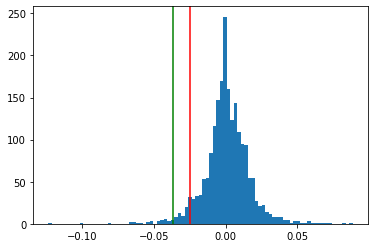

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(ret_assets, bins='auto')
plt.axvline(x=VaR, color = 'red')
plt.axvline(x=ES, color= 'green')
plt.show()